In [1]:
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_experimental.utilities import PythonREPL
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool, Tool
from langchain_google_genai import ChatGoogleGenerativeAI
import requests
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
wrapper = DuckDuckGoSearchAPIWrapper(max_results=5)
duckduckgo_search = DuckDuckGoSearchResults(api_wrapper=wrapper)

duckduckgo_search.invoke("Weather in Kathmandu")

'snippet: Get the current and hourly weather conditions for Kathmandu, Nepal, including temperature, precipitation, wind, humidity, and UV index. See the weather radar, sunrise and sunset times, and the long-term outlook for May., title: Weather today - Kathmandu, Nepal, link: https://www.weather-atlas.com/en/nepal/kathmandu, snippet: Get the latest weather forecast and report for Kathmandu, Nepal, including temperature, wind, precipitation, and UV-Index. See the hourly and daily outlook for the next week and compare different forecast models., title: Weather Kathmandu - meteoblue, link: https://www.meteoblue.com/en/weather/week/kathmandu_nepal_1283240, snippet: Get the latest hourly and 12-day weather forecast for Kathmandu, Nepal, including rain, sun, wind, humidity and temperature. See maps, charts and warnings for outdoor activities and travel planning., title: Kathmandu Weather Forecast, link: https://www.weather-forecast.com/locations/Kathmandu/forecasts/latest, snippet: The temp

In [3]:
# Math
@tool
def wolfram_alpha_llm_api(query: str) -> dict:
    """
    Function to run a query through the Wolfram Alpha LLM API for Accurate Math Questions
    
    Parameters:
    - query (str): The question or query to be sent to the API.
    
    Returns:
    - dict: The response from the API.
    """
    WOLFRAM_ALPHA_APPID = os.environ.get("WOLFRAM_ALPHA_APPID")
    url = "https://api.wolframalpha.com/v1/result"
    params = {
        "i": query,
        "appid": WOLFRAM_ALPHA_APPID,
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return {"result": response.text}
    else:
        return {"error": f"Error: {response.status_code}, {response.text}"}
    
wolfram_alpha_llm_api.invoke("What is the integral of x^2?")

{'result': 'x^3/3'}

Successfully received base64 image data.


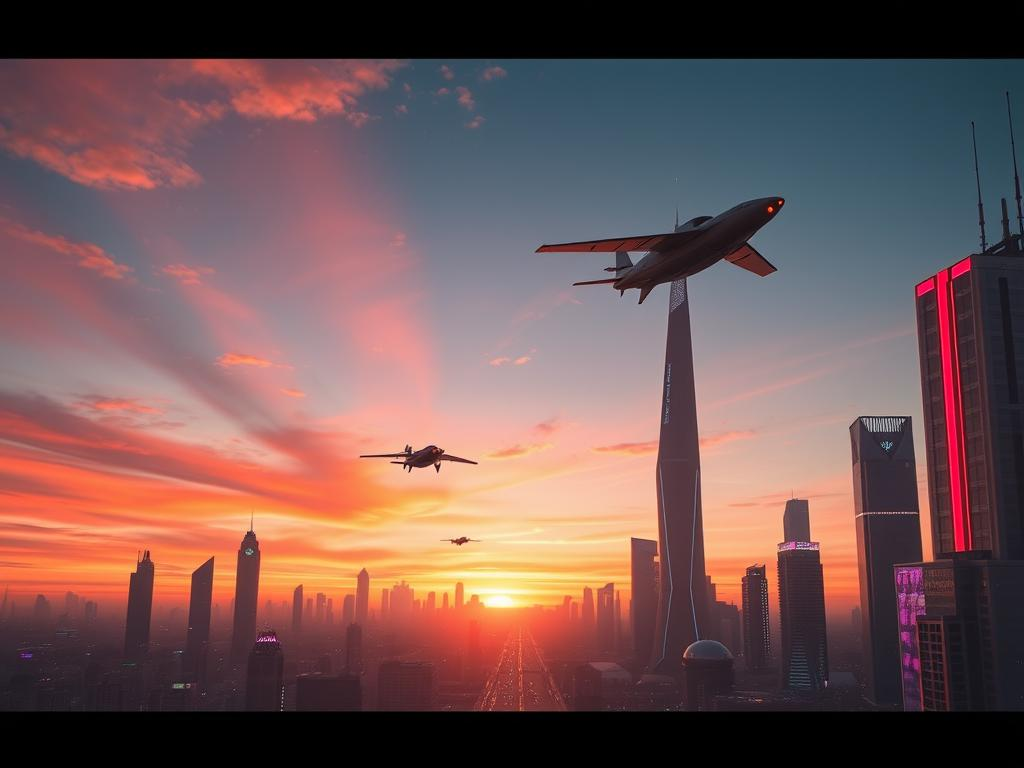

In [ ]:
# from together import Together
# from dotenv import load_dotenv
# import os
# import base64
# from IPython.display import Image, display # Import Image from IPython.display

# load_dotenv()
# api_key = os.getenv("TOGETHER_API_KEY")

# client = Together(api_key=api_key)

# try:
#     response = client.images.generate(
#         prompt="A futuristic city skyline at sunset, with flying cars and neon lights",
#         model="black-forest-labs/FLUX.1-schnell-Free",
#         width=1024,
#         height=768,
#         response_format="b64_json", # This is correct for base64 output
#         steps=4,
#         n=1,
#         stop=[],
#     )

#     # Check if the response contains image data
#     if response and response.data and response.data[0].b64_json:
#         # The image data is in response.data[0].b64_json
#         image_b64 = response.data[0].b64_json
#         print("Successfully received base64 image data.")

#         # Decode the base64 string
#         image_data = base64.b64decode(image_b64)

#         # Display the image directly in the notebook cell using IPython.display.Image
#         display(Image(data=image_data))

#     else:
#         print("No image data found in the response.")

# except Exception as e:
#     print(f"An error occurred: {e}")
#     # You'll likely see the 429 error here until the rate limit resets

In [25]:
from together import Together
#Image gen
@tool
def generate_flux_image(prompt:str)->str:
    """
    Function to generate an image using the FLUX model from Together.
    
    Parameters:
    - prompt (str): The prompt for the image generation.
    
    Returns:
    - str: url of the generated image.
    """
    client = Together(api_key=os.getenv("TOGETHER_API_KEY"))
    
    response = client.images.generate(
        prompt=prompt,
        model="black-forest-labs/FLUX.1-schnell-Free",
        width=1024,
        height=768,
        response_format="b64_json",
        steps=4,
        n=1,
        stop=[],
    )
    
    return response.data[0].b64_json


generate_flux_image.invoke("Beautiful winkie country landscape with mountains and a river")



'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAMABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDppLc+lV2hPpXazaKrcrx+FV/7EXOGH41vzIwcWca0RHaomQ12cugqR8tYt1pjRMRtNF7haxhkU01blgKnpVdkxRYCLNANKVpuMUgHhqcGqKlBpATBqeHqAGlBpDLSyVKslUwakU0rFXL6SVOklZ6PVhHpWGmaCPVmM81nxtV

In [26]:
# import requests
# from io import BytesIO
# from PIL import Image
# from IPython.display import display # Import display

# api_key = os.getenv("SEGMIND_API_KEY")  # Replace with your actual API key
# url = "https://api.segmind.com/v1/fast-flux-schnell"

# # Request payload
# data = {
#   "prompt": "A futuristic city skyline at sunset, with flying cars and neon lights",
#   "steps": 4,
#   "seed": 1184522,
#   "aspect_ratio": "1:1",
#   "base64": False
# }

# headers = {'x-api-key': api_key}

# response = requests.post(url, json=data, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
#     # Use BytesIO to treat the byte string as a file
#     image_bytes = BytesIO(response.content)
#     # Open the image using Pillow
#     img = Image.open(image_bytes)
#     # Display the image directly in the notebook cell
#     display(img)
#     print("Image displayed in the notebook cell.")
# else:
#     print(f"Error: {response.status_code} - {response.text}")

In [27]:
# python executuin
python_repl = PythonREPL()

repl_tool = Tool(
    name ="python_repl",
    description="A python shell. Use this to execute python commands. Input should be valid python commands. ALWAYS print any result out with `print(..)`",
    func=python_repl.run,
)

repl_tool.invoke("print(2+2)")

'4\n'

In [28]:
# define list of tools
tools = [
    duckduckgo_search,
    wolfram_alpha_llm_api,
    generate_flux_image,
    repl_tool
]
load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.0-flash",
    temperature = 0.7,
    max_output_tokens = 512,
    api_key = api_key,
)

In [29]:
# Construct the ReAct agent
from langgraph.prebuilt import create_react_agent
system_prompt="Ensure your generation of the image URL is exact, add an extra space after it to ensure no new lines mess it up. Always use Wolfram Alpha for Math questions, and use $$ $$ for markdown formatting with math. Always print executed python statements for logging."
gemini_hulk = create_react_agent(llm, tools, prompt=system_prompt)

# Agent Stream Output

## Initiating Agent Stream

#### Tool Output:

{"result": "304/31"}

#### Tool Output:

snippet: Regional Outbreaks of Severe Weather Through Early Next Week; Early Season Heat Wave across the South ... San Francisco CA 37.77°N 122.41°W (Elev. 131 ft) Last Update: 5:05 am PDT May 18, 2025. Forecast Valid: 11am PDT May 18, 2025-6pm PDT May 24, 2025 . Forecast Discussion . Additional Resources. Radar & Satellite Image., title: National Weather Service, link: https://forecast.weather.gov/zipcity.php?inputstring=San+Francisco,CA, snippet: San Francisco Weather Forecasts. Weather Underground provides local & long-range weather forecasts, weatherreports, maps & tropical weather conditions for the San Francisco area., title: San Francisco, CA Weather Conditions | Weather Underground, link: https://www.wunderground.com/weather/us/ca/san-francisco/94112, snippet: The National Weather Service forecast for the greater San Francisco Bay Area for Thursday calls for chances of rain throughout the day, with much heavier precipitation in the forecast next week ..., title: San Francisco Bay Area weather and First Alert Weather forecasts - CBS ..., link: https://www.cbsnews.com/sanfrancisco/weather/, snippet: Get the current and 5-day weather forecast for San Francisco, California, with temperature, wind, precipitation, UV-Index, and more. See live satellite images, radar, and lightning data for the area., title: Weather San Francisco - meteoblue, link: https://www.meteoblue.com/en/weather/week/san-francisco_united-states_5391959

#### Tool Output:

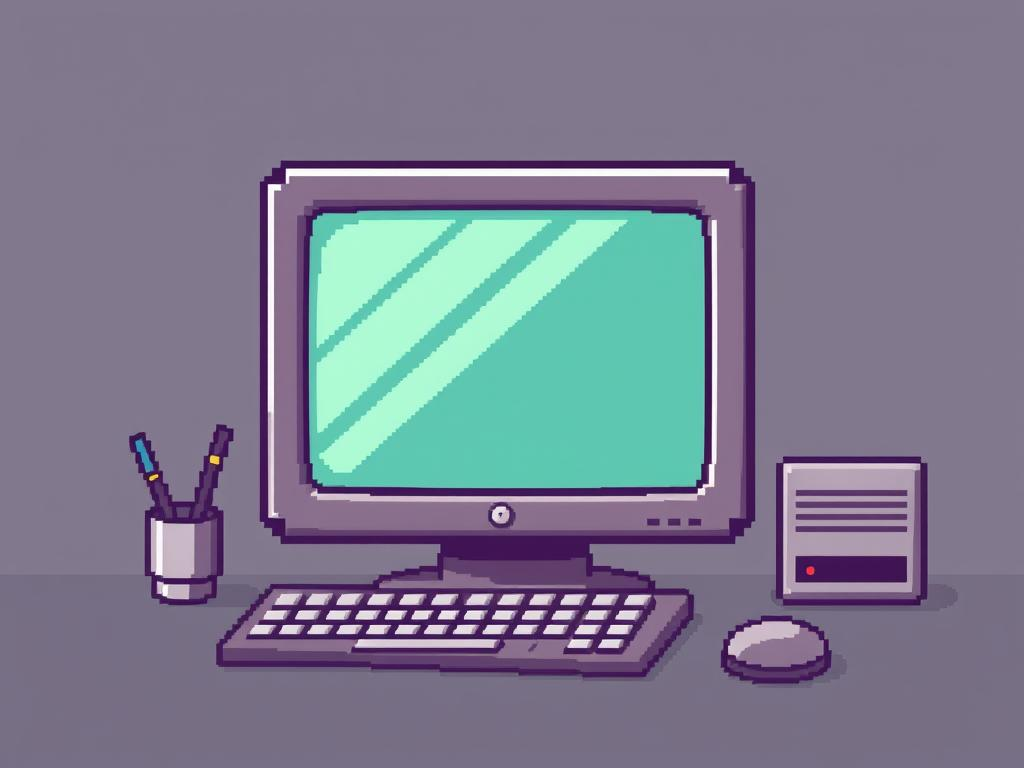

Image displayed successfully from base64 data.

#### Tool Output:

hello world


## Agent Message

Okay, here are the answers to your questions:

*   3^2 + 5/62 * e^log(10)  is approximately $$ \frac{304}{31} $$.
*   I do not have the current, real-time weather conditions for San Francisco, but the National Weather Service forecast for the greater San Francisco Bay Area for Thursday, May 18, 2025, calls for chances of rain throughout the day, with much heavier precipitation in the forecast next week.
*   Here is the URL for the pixel art computer image: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAMABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFE

## End

In [31]:
import json
from langchain.schema import HumanMessage, SystemMessage
from IPython.display import display, Markdown, Image, HTML
# You will also need to import `base64` and potentially `requests`, `BytesIO`
# if you still plan to handle URL-based images from other tools.
# Based on your tool, we only need base64 for the flux image.
import base64

def print_markdown(content):
    display(Markdown(content))

def print_step(step_name):
    print_markdown(f"## {step_name}")

def print_tool_call(tool_name, query):
    print_markdown(f"### Tool Called: {tool_name}")
    print_markdown(f"**Query:** {query}")

def print_tool_output(message):
    print_markdown("#### Tool Output:")
    # Check if the message is from your generate_flux_image tool
    if message.name == 'generate_flux_image':
        image_b64_string = message.content.strip() # Get the base64 string
        if image_b64_string:
            try:
                # Decode the base64 string to bytes
                image_data = base64.b64decode(image_b64_string)
                # Display the image using IPython.display.Image
                display(Image(data=image_data))
                print_markdown("Image displayed successfully from base64 data.")
            except Exception as e:
                print_markdown(f"Error decoding or displaying image from base64: {e}")
                print_markdown(f"Raw base64 content (first 100 chars): {image_b64_string[:100]}...") # Print a snippet for debugging
        else:
            print_markdown("Image generation tool returned empty base64 data.")
    # You can keep or remove the logic for other image tools if you still use them
    # elif message.name == 'generate_dalle_image' or message.name == 'generate_sdxl_image':
    #     # Your existing logic for handling image URLs if needed
    #     image_url = message.content.strip()
    #     print(f"Attempting to display image from URL: {image_url}")
    #     try:
    #         response = requests.get(image_url)
    #         response.raise_for_status()
    #         content_type = response.headers.get('Content-Type', '')
    #         if 'image' in content_type:
    #             encoded_image = base64.b64encode(response.content).decode('utf-8')
    #             display(Image(data=base64.b64decode(encoded_image)))
    #         else:
    #             print_markdown(f"Tool returned non-image content: {response.text}")
    #     except requests.exceptions.RequestException as e:
    #         print_markdown(f"Failed to fetch image from URL: {e}")
    #         print_markdown(f"Original URL provided: {image_url}")
    #         print_markdown(f"Image URL: {image_url}")
    else:
        # For all other tool outputs (like math, weather, python), print as Markdown
        print_markdown(message.content)

def print_final_message(message):
    print_markdown("## Agent Message")
    print_markdown(message)

print_markdown("# Agent Stream Output")
print_step("Initiating Agent Stream")

prompt = "What is 3^2+5/62*e^log(10) return with $$ $$ for markdown, and whats the weather in sf, and can you make an image of a pixel art computer, also can you execute helloworld in python"

chunks = []
async for chunk in gemini_hulk.astream(
    {"messages": [
        HumanMessage(content=prompt),
        
    ]}
):
    chunks.append(chunk)
    
    if 'agent' in chunk:
        for message in chunk['agent']['messages']:
            if message.additional_kwargs.get('tool_calls'):
                for tool_call in message.additional_kwargs['tool_calls']:
                    tool_name = tool_call['function']['name']
                    arguments = json.loads(tool_call['function']['arguments'])
                    query = arguments.get('query') or arguments.get('prompt') or arguments.get('__arg1')
                    print_tool_call(tool_name, query)
    
    if 'tools' in chunk:
        for message in chunk['tools']['messages']:
            print_tool_output(message)
    
    if 'agent' in chunk and chunk['agent']['messages'][0].content:
        final_message = chunk['agent']['messages'][0].content.replace(')', ') ')  # Add space to parenthesis
        
        print_final_message(final_message)

print_step("End")